In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Boosting
Skeleton
- Learning Curve
- Hyperparameter Tuning + Validation Curve + Wall Clock

# Titanic

## Get train and test

In [20]:
from functions import preprocess_titanic, SEED, generate_learning_curve, generate_validation_curve

In [4]:
from sklearn.metrics import roc_auc_score

In [5]:
X_train, X_test, y_train, y_test = preprocess_titanic()

## Baseline Learning Curve

In [6]:
estimator = GradientBoostingClassifier(random_state=SEED)

train roc auc:  0.9582384206529994
test roc auc: 0.8146245059288538


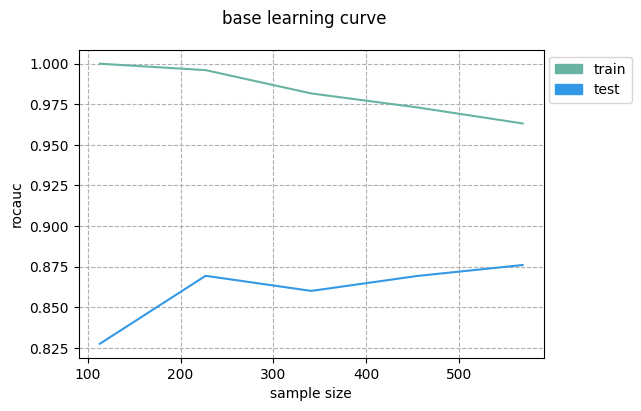

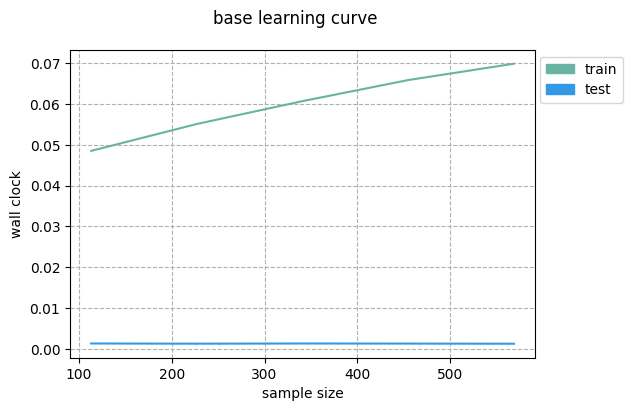

In [7]:
generate_learning_curve(estimator, X_train, y_train, X_test, y_test, "sample size", "base learning curve", "roc_auc")

## Validation Curve

### Pruning (PRE)
We can be more aggressive, then use lower hyperparam from DT

#### Max Depth

In [8]:
params = [1,2,3,4,5,6,7,8,9,10]
estimators = []
for param in params:
    estimator = GradientBoostingClassifier(random_state=SEED, max_depth=param)
    estimators.append(estimator)

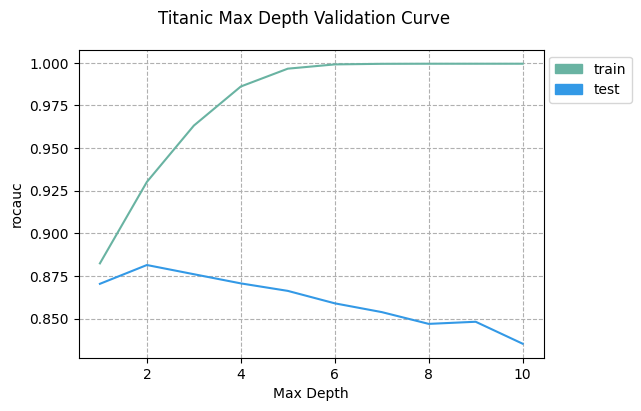

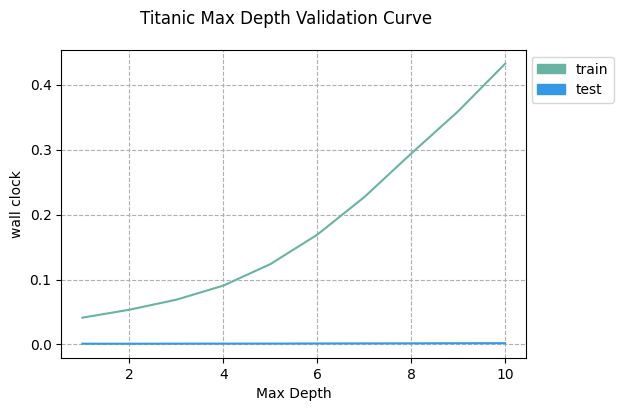

In [9]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "Max Depth", "Titanic Max Depth Validation Curve", graph_type='line')

#### Max Nodes

In [10]:
params = [2,3,4,5,6,7,8,9,10]
estimators = []
for param in params:
    estimator = GradientBoostingClassifier(random_state=SEED, max_depth=2, max_leaf_nodes=param)
    estimators.append(estimator)

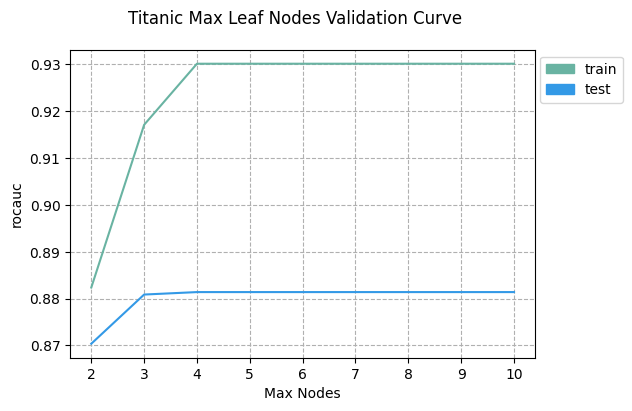

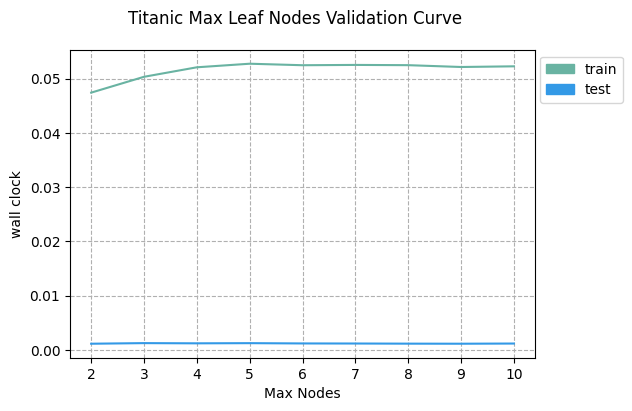

In [11]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "Max Nodes", "Titanic Max Leaf Nodes Validation Curve", graph_type='line')

### # of Weak Learners

In [12]:
params = [25,50,75,100,125,150,175,200]
estimators = []
for param in params:
    estimator = GradientBoostingClassifier(random_state=SEED, n_estimators=param, max_depth=2, max_leaf_nodes=4)
    estimators.append(estimator)

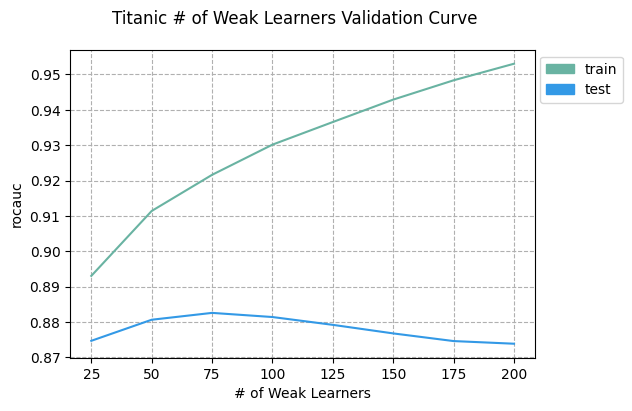

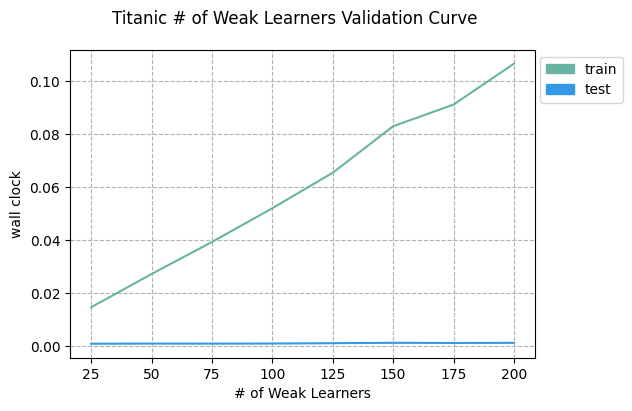

In [13]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "# of Weak Learners", "Titanic # of Weak Learners Validation Curve",'line',"roc_auc_ovo")

### Learning Rate

In [21]:
params = [0.01, 0.05, 0.1, 0.15, 0.2]
estimators = []
for param in params:
    estimator = GradientBoostingClassifier(random_state=SEED, max_depth=2, max_leaf_nodes=4, learning_rate=param, n_estimators=75)
    estimators.append(estimator)

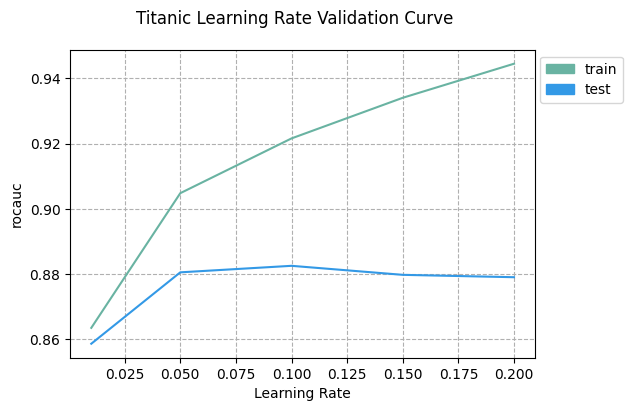

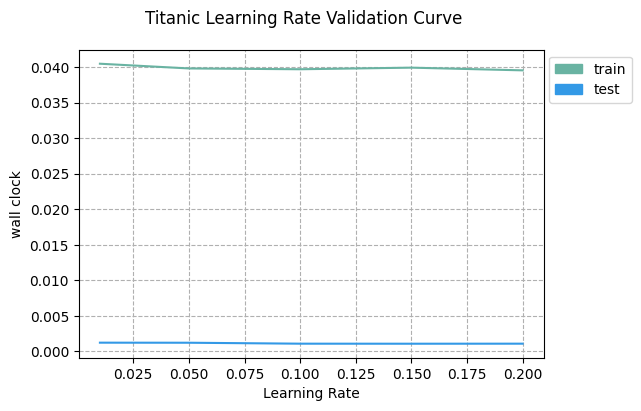

In [22]:
generate_validation_curve(estimators, params, X_train, y_train, X_test, y_test, "Learning Rate", "Titanic Learning Rate Validation Curve",'line',"roc_auc_ovo")

In [14]:
from functions import trigger_validate

train wall clock: 0.03977923393249512
test wall clock: 0.0011258602142333984
train roc auc:  0.9178994885145226
test roc auc: 0.8229907773386034


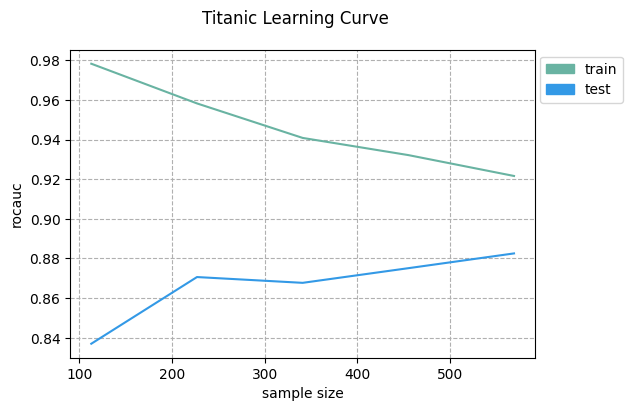

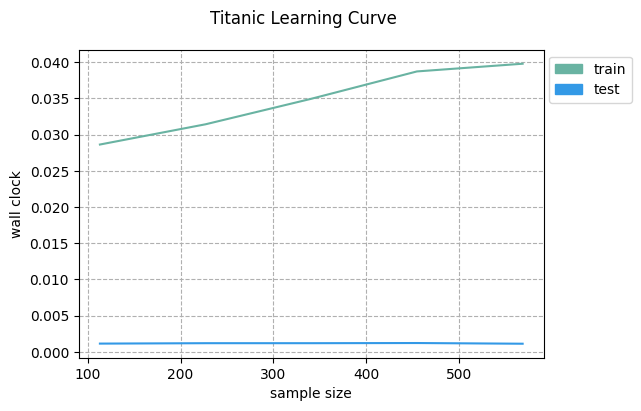

In [23]:
estimator = GradientBoostingClassifier(random_state=SEED, n_estimators=75, max_depth=2, max_leaf_nodes=4, learning_rate=0.1)
generate_learning_curve(estimator, X_train, y_train, X_test, y_test, "sample size", "Titanic Learning Curve", "roc_auc")